# Applied Machine Learning Project 1 - Group 14 - Rakshitha, Diana

# Regression Task

# Zomato Dataset to predict the Aggregate Rating

DATASET DESCRIPTION

Restaurant ID: Identification Number
Restaurant Name: Name Of the Restaurant
Country Code: 216
City: Name of the Restaurant
Address:
Locality: Short Address Of the Restaurant
Locality Verbose: Long Address of the Restaurant
Longitude: Longitude
Latitude: Latitude
Cuisines: Types Of Cuisines Served
Average Cost for two: Average Cost if two people visit the Restaurant
Currency: Dollars
Has Table booking: Can we book tables in Restaurant? Yes/No
Has Online delivery: Can we have online delivery ? Yes/No
Is delivering now: Is the Restaurant delivering food now? Yes/No
Switch to order menu: Switch to order menu ? Yes/ No
Price range: Categorized price between 1 -4
Aggregate rating: Categorizing ratings between 1-5
Rating color: Different colors representing Customer Rating
Rating text: Different Rating like Excellent, Very Good ,Good, Avg., Poor, Not Rated
Votes: No.Of Votes received by restaurant from customers
    
Target variable: Aggregate Rating

LINK TO DATASET: https://www.kaggle.com/shrutimehta/zomato-restaurants-data

MinMaxScaler: Many machine learning algorithms work better when features are on a relatively similar scale. We have used MinMaxScaler as the type of scaling. 
MinMaxScaler preserves the shape of the original distribution. The default range for the feature returned by MinMaxScaler is 0 to 1 and the relative spaces between each feature’s values are maintained by MinMaxScaler.
Whereas in StandardScaler, the values are on a similar scale, but the range is larger than after MinMaxScaler. So, we are using MinMaxScaler as the default and since it’s non-distorting.

# Step 1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from PIL import *
import graphviz
%matplotlib inline

c:\users\vnrak\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\users\vnrak\appdata\local\programs\python\python36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Step 2 : Preprocessing 

In [2]:
data= pd.read_csv('zomato_dataset_regression.csv',encoding="ISO-8859-1")
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Average Cost in Dollars', 'ConvertedCurrency',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [3]:

null_data = data.loc[data['Cuisines'].isnull()]
null_data


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34.0
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36.0
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160.0
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209.0
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102.0
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,Dollar($),No,No,No,No,1,NaN,Orange,Average,NaN
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158.0
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707.0
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309.0


In [4]:
data.isna().any()

Restaurant ID              False
Restaurant Name            False
Country Code               False
City                       False
Address                    False
Locality                   False
Locality Verbose           False
Longitude                  False
Latitude                   False
Cuisines                    True
Average Cost for two        True
Average Cost in Dollars     True
ConvertedCurrency          False
Currency                   False
Has Table booking          False
Has Online delivery        False
Is delivering now          False
Switch to order menu       False
Price range                False
Aggregate rating            True
Rating color               False
Rating text                False
Votes                       True
dtype: bool

In [5]:
#get the mean of Average Cost in Dollars and replace it NaN
data['Average Cost in Dollars'].fillna(data['Average Cost in Dollars'].mean(), inplace = True) 

In [6]:
#get the mean of Aggregate rating  and replace it NaN
data['Aggregate rating'].fillna(data['Aggregate rating'].mean(), inplace = True) 

In [7]:
#get the mean of Votes  and replace it NaN
data['Votes'].fillna(data['Votes'].mean(), inplace = True) 

In [8]:
#data cleanup for categorical variables
cleanup = {'Has Table booking': {'Yes': 1, 'No': 0}, #Encoding Yes as 1 and No as 0
           'Has Online delivery': {'Yes': 1, 'No': 0},
           'Is delivering now' : {'Yes': 1, 'No': 0},
           'Switch to order menu' : {'Yes': 1, 'No': 0},
           'Rating text' : {'Not rated': 0, 'Poor': 1, 'Average': 2, 'Good': 3, 'Very Good': 4, 'Excellent' : 5}}
data.replace(cleanup, inplace = True)
noRatng = data[data['Rating text']==0]
print(noRatng['Rating text'].count())
data = data[data['Rating text']!=0]
data.head()

2148


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,0,0,3,4.8,Dark Green,5,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,0,0,3,4.5,Dark Green,5,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,0,0,4,4.4,Green,4,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),0,0,0,0,4,4.9,Dark Green,5,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),1,0,0,0,4,4.8,Dark Green,5,229.0


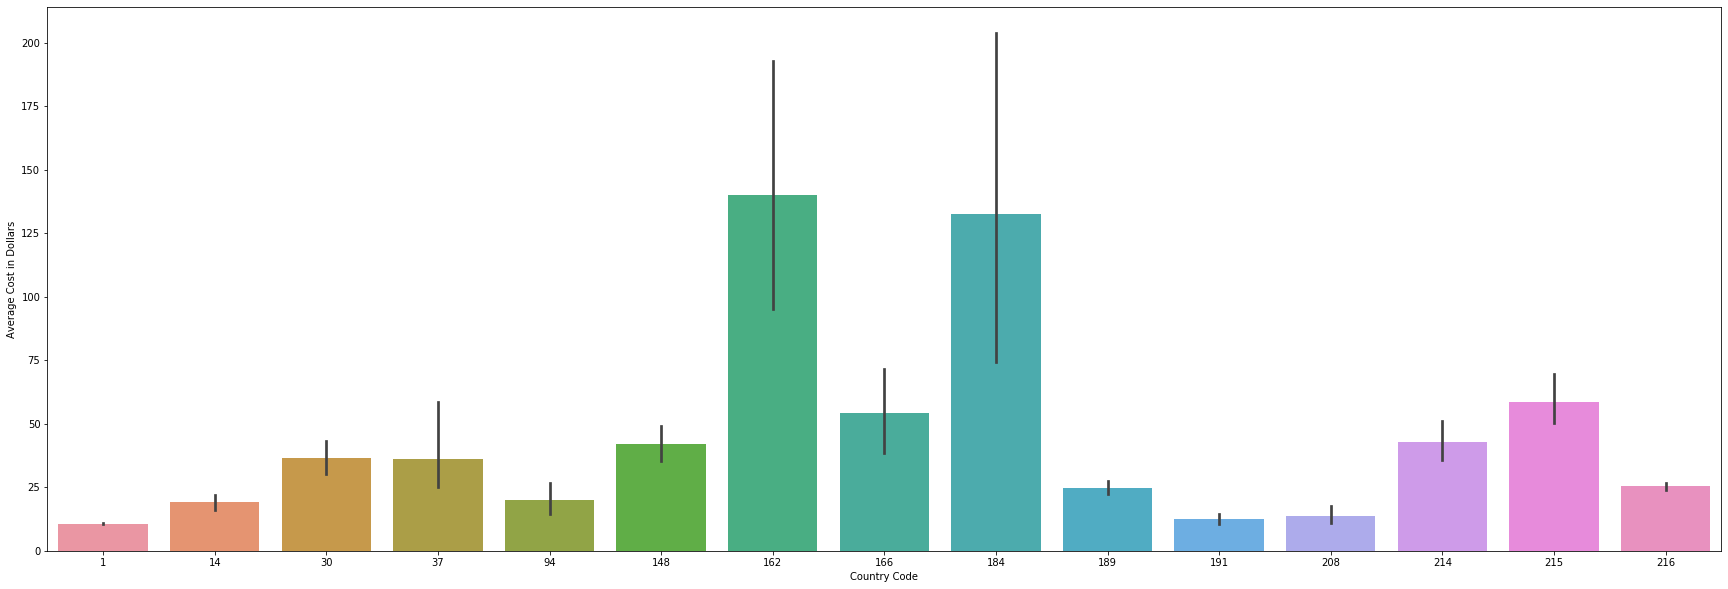

In [9]:
plt.figure(figsize=(30,10))
sns.barplot(x='Country Code',y='Average Cost in Dollars',data= data,estimator=np.mean)

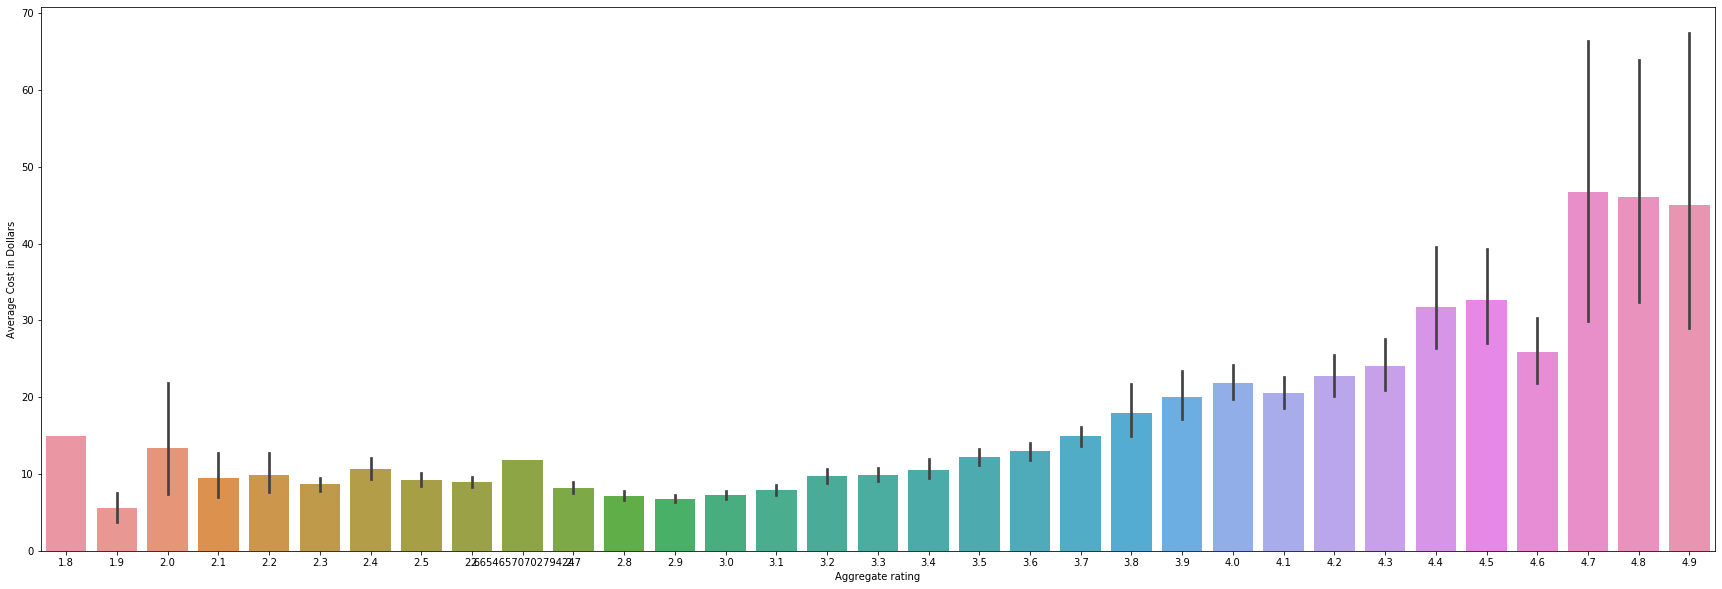

In [10]:
plt.figure(figsize=(30,10))
sns.barplot(x='Aggregate rating',y='Average Cost in Dollars',data= data,estimator=np.mean)

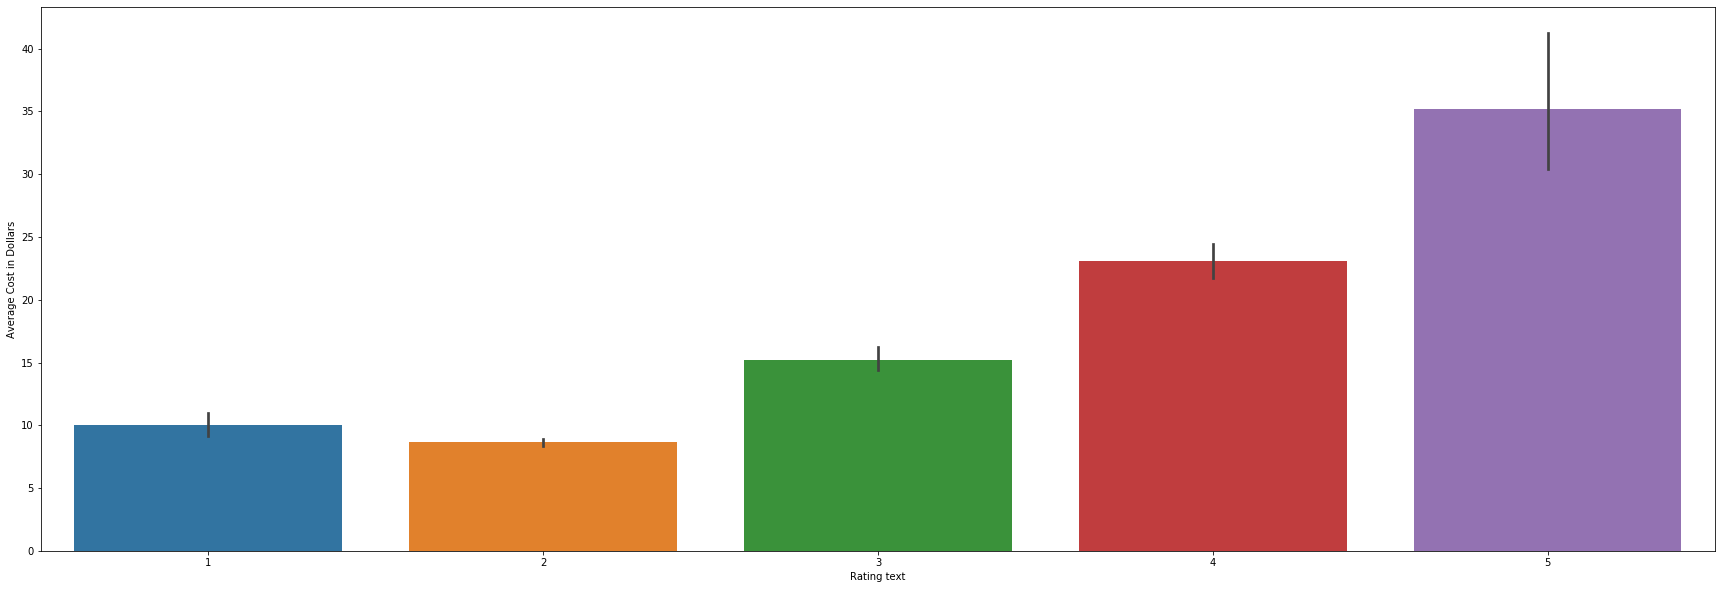

In [11]:
plt.figure(figsize=(30,10))
sns.barplot(x='Rating text',y='Average Cost in Dollars',data= data,estimator=np.mean)

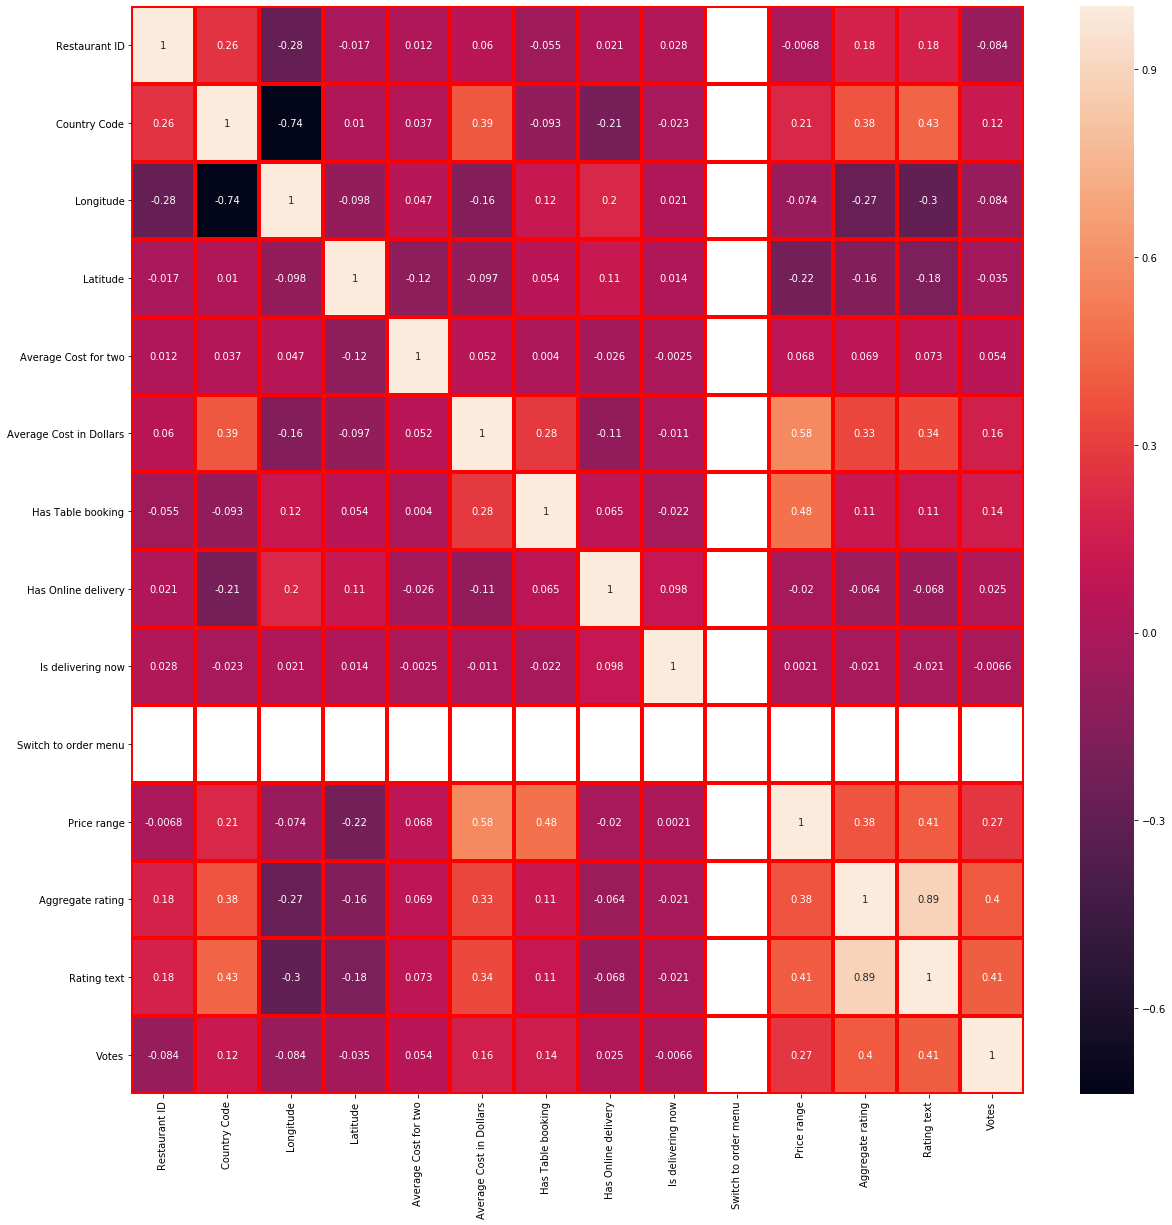

In [12]:
#plotting correlation matrix with all the features
plt.figure(figsize=(20,20))
d=data.corr()
sns.heatmap(d,annot= True,linecolor='red',linewidths=3)

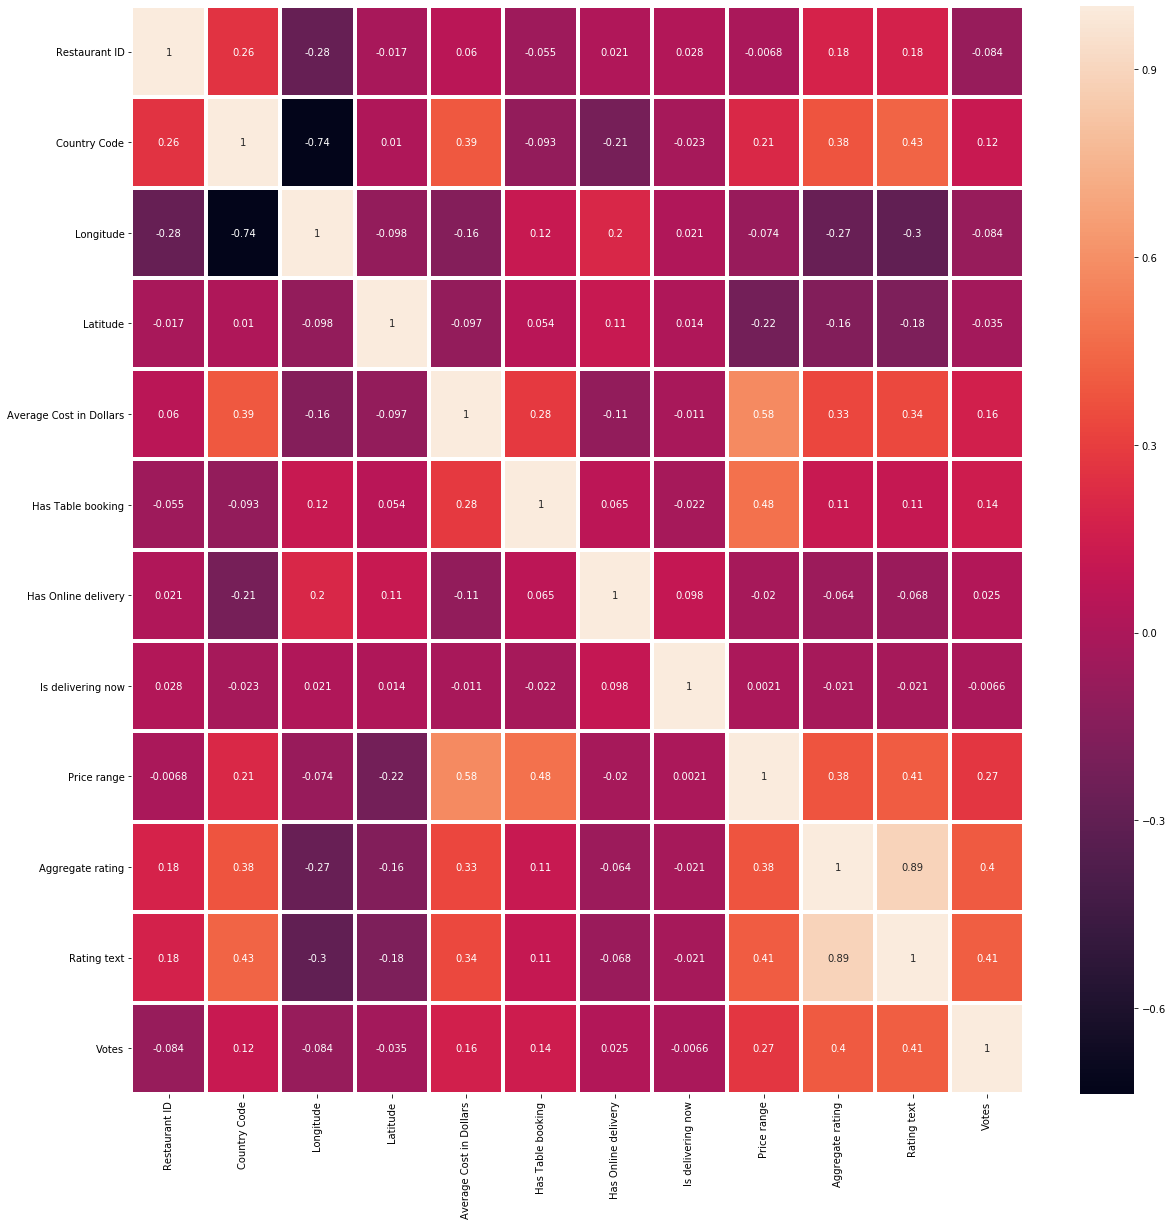

In [13]:
#plotting correlation matrix with all the features excluding the less important features
data.drop(['Cuisines','Average Cost for two','Restaurant Name','City','Address','Locality','Locality Verbose','ConvertedCurrency', 'Currency' ,'Rating color','Switch to order menu'],axis=1,inplace=True)
data_corr1= data.corr()
fig=plt.figure(figsize=(20,20))
sns.heatmap(data_corr1,annot= True,linecolor='white',linewidths=3)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7403 entries, 0 to 9550
Data columns (total 12 columns):
Restaurant ID              7403 non-null int64
Country Code               7403 non-null int64
Longitude                  7403 non-null float64
Latitude                   7403 non-null float64
Average Cost in Dollars    7403 non-null float64
Has Table booking          7403 non-null int64
Has Online delivery        7403 non-null int64
Is delivering now          7403 non-null int64
Price range                7403 non-null int64
Aggregate rating           7403 non-null float64
Rating text                7403 non-null int64
Votes                      7403 non-null float64
dtypes: float64(5), int64(7)
memory usage: 1.0 MB


# Step 3 : Running various models

## Regression Task

In [15]:
from sklearn.model_selection import train_test_split
x= data.drop('Aggregate rating',axis=1)
y=data['Aggregate rating']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=150)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 1. Ridge Regression 

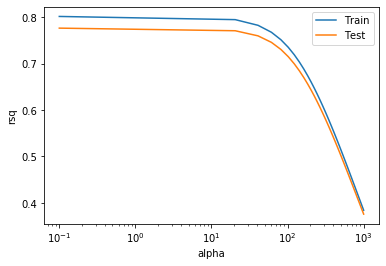

In [17]:
from  sklearn.linear_model import Ridge

x_range = list(np.linspace(0.1,1000))
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha,fit_intercept=True)
    ridge.fit(x_train,y_train)
    train_score_list.append(ridge.score(x_train,y_train))
    test_score_list.append(ridge.score(x_test, y_test))
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_range,train_score_list,label='Train')
plt.plot(x_range,test_score_list,label='Test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('rsq')
plt.legend()
plt.show()

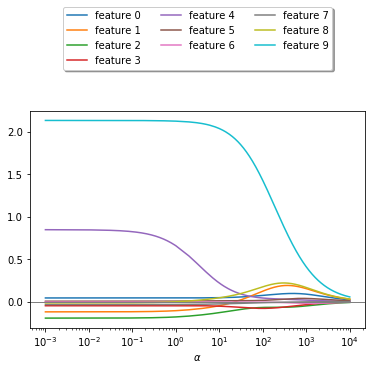

In [18]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [19]:
#Using Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
a = list(np.linspace(0.01,1000))
param_grid = dict(alpha=a)
grid = GridSearchCV(ridge, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is alpha ={}'.format(grid.best_params_))

best param is alpha ={'alpha': 0.01}


In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
#Using cross validation
ridge = Ridge(alpha = 0.01)
train_score_list = cross_val_score(ridge,x_train,y_train,cv=5)
test_score_list = cross_val_score(ridge,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8001
Avg Test Score:0.7721


In [22]:
#train and test score for alpha=0.01
ridge=Ridge(alpha=0.01)
rid=ridge.fit(x_train,y_train)
train_score=rid.score(x_train,y_train)
test_score= rid.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.8017474157802507
test_score:0.7765562673738089


## 2. Lasso Regression

Text(0.5, 0, '$\\alpha$')

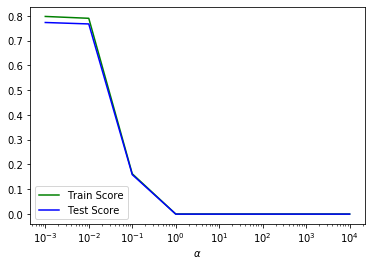

In [23]:
from sklearn.linear_model import Lasso
x_range = [0.001, 0.01, 0.1, 1, 10, 100,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha,fit_intercept=True)
    lasso.fit(x_train,y_train)
    train_score_list.append(lasso.score(x_train,y_train))
    test_score_list.append(lasso.score(x_test, y_test))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

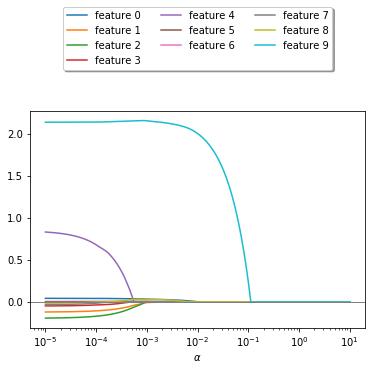

In [24]:
%matplotlib inline

x_range1 = np.linspace(0.00001, 0.001, 1000).reshape(-1,1)
x_range2 = np.linspace(0.001, 10, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha,fit_intercept=True)
    lasso.fit(x_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,10):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [25]:
#Using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
a = list(np.linspace(0.01,1000))
param_grid = dict(alpha=a)
grid = GridSearchCV(lasso, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is alpha ={}'.format(grid.best_params_))

best param is alpha ={'alpha': 0.01}


In [26]:
#Using Cross Validation
from sklearn.model_selection import cross_val_score
lasso = Lasso(alpha=0.01)
train_score_list = cross_val_score(lasso,x_train,y_train,cv=5)
test_score_list = cross_val_score(lasso,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.7902
Avg Test Score:0.7645


In [27]:
#train and test score for alpha=0.01
lasso=Lasso(alpha=0.01)
lass=lasso.fit(x_train,y_train)
train_score=lass.score(x_train,y_train)
test_score= lass.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.7905287836799851
test_score:0.7677170297944425


## 3. Linear Regression 


In [28]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
print("Train:%.4f"%lr.score(x_train,y_train))
print("Test:%.4f"%lr.score(x_test,y_test))

Train:0.8017
Test:0.7766


In [29]:
##Using Cross Validation 
from sklearn.model_selection import cross_val_score
reg = LinearRegression(fit_intercept=True)
scores_train= cross_val_score(reg, x_train,y_train,cv=5)
scores_test= cross_val_score(reg,x_test,y_test)
print('mean train score is {}'.format(scores_train.mean()))
print('mean test score is {}'.format(scores_test.mean()))

mean train score is 0.8000806239023207
mean test score is 0.7683895520083414


c:\users\vnrak\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


## 4. KNN Regressor

Text(0, 0.5, 'rsq')

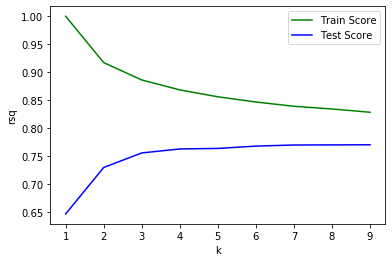

In [30]:
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(x_train, y_train)
    train_score_array.append(knn_reg.score(x_train, y_train))
    test_score_array.append(knn_reg.score(x_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('rsq')

In [31]:
#Using grid search
from sklearn.model_selection import GridSearchCV
k = list(range(1, 10))
param_grid = dict(n_neighbors=k)
grid = GridSearchCV(knn_reg, param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is k ={}'.format(grid.best_params_))

best param is k ={'n_neighbors': 7}


In [32]:
#Using Cross Validation
from sklearn.model_selection import cross_val_score
knn_reg = KNeighborsRegressor(n_neighbors=7)
train_score_list = cross_val_score(knn_reg,x_train,y_train,cv=5)
test_score_list = cross_val_score(knn_reg,x_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.7762
Avg Test Score:0.7321


In [33]:
#k=8 showing no more changes in the test and train score
knn= KNeighborsRegressor(n_neighbors=8)
kn=knn.fit(x_train,y_train)
train_score=kn.score(x_train,y_train)
test_score=kn.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.8340411674851879
test_score:0.7697276172074338


In [34]:
#k=7
knn= KNeighborsRegressor(n_neighbors=7)
kn=knn.fit(x_train,y_train)
train_score=kn.score(x_train,y_train)
test_score=kn.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.8388076136437073
test_score:0.7695473868332616


In [35]:
#k=3
knn= KNeighborsRegressor(n_neighbors=3)
kn=knn.fit(x_train,y_train)
train_score=kn.score(x_train,y_train)
test_score=kn.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.8859905461368301
test_score:0.7553375201540911


In [36]:
#k=2
knn= KNeighborsRegressor(n_neighbors=2)
kn=knn.fit(x_train,y_train)
train_score=kn.score(x_train,y_train)
test_score=kn.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:0.9169521976536973
test_score:0.7292739615189888


In [37]:
#k=1
knn= KNeighborsRegressor(n_neighbors=1)
kn=knn.fit(x_train,y_train)
train_score=kn.score(x_train,y_train)
test_score=kn.score(x_test,y_test)
print('train_score:{}'.format(train_score))
print('test_score:{}'.format(test_score))

train_score:1.0
test_score:0.6461947551398735


## 5. Linear SVM Regression

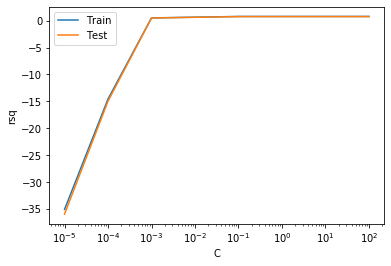

In [38]:
from sklearn.svm import LinearSVR
train_score_list=[]
test_score_list=[]
C=[0.00001,0.0001,0.001,0.1,0.2,0.3,1,10,100]

for i in C:
    svr = LinearSVR(C=i,max_iter=1000000,fit_intercept=True)
    svr.fit(x_train,y_train)
    train_score_list.append(svr.score(x_train,y_train))
    test_score_list.append(svr.score(x_test,y_test))

%matplotlib inline
plt.plot(C,train_score_list,label='Train')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('rsq')
plt.plot(C,test_score_list,label='Test')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('rsq')
plt.legend()

In [39]:
#Using grid search
from sklearn.model_selection import GridSearchCV
c= [0.1,0.2,0.3,0.5,1]
param_grid = dict(C=c)
grid = GridSearchCV(svr,param_grid, cv=5)
grid.fit(x_train,y_train)
print('best param is c ={}'.format(grid.best_params_))

best param is c ={'C': 1}


In [40]:
#Using cross validation
from sklearn.model_selection import cross_val_score
svr = LinearSVR(C=1,max_iter=10000)
scores_train = cross_val_score(svr,x_train,y_train, cv=5)
scores_test= cross_val_score(svr,x_test,y_test, cv=5)
print('avg train score {}'.format(scores_train.mean()))
print('avg test score {}'.format(scores_test.mean()))

avg train score 0.7951400092422382
avg test score 0.7680874202226915


## 6. Polynomial Regression

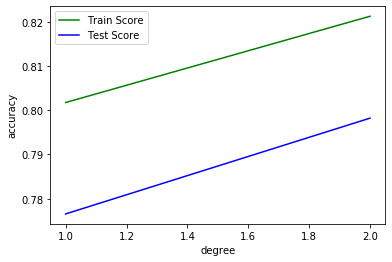

In [41]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    lr.fit(x_train_poly, y_train)
    train_score_list.append(lr.score(x_train_poly, y_train))
    test_score_list.append(lr.score(x_test_poly, y_test))
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [42]:
train_score_list

[0.8017474314162404, 0.8212484746254299]

In [43]:
test_score_list

[0.7765568253022058, 0.7982079987705385]

In [44]:
#Using cross validation
from sklearn.model_selection import cross_val_score
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
lr=LinearRegression()
lr.fit(x_train_poly,y_train)
scores_train = cross_val_score(lr,x_train_poly,y_train,cv=5)
scores_test = cross_val_score(lr,x_test_poly,y_test,cv=5)
print("Cross-validation Train scores: {}".format(scores_train))
print("Average Train cross-validation score: {:.2f}".format(scores_train.mean()))
print("Cross-validation Test scores: {}".format(scores_test))
print("Average Test cross-validation score: {:.2f}".format(scores_test.mean()))

Cross-validation Train scores: [0.80625026 0.80341853 0.81610332 0.80304549 0.76797124]
Average Train cross-validation score: 0.80
Cross-validation Test scores: [-1.10606132e+20 -3.04162321e+00  7.82128261e-01  7.88074773e-01
  7.80319923e-01]
Average Test cross-validation score: -22121226424982020096.00


## 7. Kernelized SVM Regression

## a. Linear Kernel

In [45]:
#grid search
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
scores_test=[]
scores_train=[]
c= [0.0001,0.001,0.01,0.1,1,10]
gamma=[0.0001,0.001,0.01,0.1,1,10]
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10],'gamma':[0.0001,0.001,0.01,0.1,1,10]}
grid = GridSearchCV(SVR(kernel='linear'),param_grid, cv=5)
grid.fit(x_train,y_train)
print('best params are  ={}'.format(grid.best_params_))

best params are  ={'C': 10, 'gamma': 0.0001}


In [46]:
#cross validation 
from sklearn.model_selection import cross_val_score
scores_train=[]
scores_test=[]
scores_train = cross_val_score(SVR(kernel='linear',gamma=0.0001,C=10),x_train,y_train, cv=5)
scores_test= cross_val_score(SVR(kernel='linear',gamma=0.0001,C=10),x_test,y_test, cv=5)
print('avg train score {}'.format(scores_train.mean()))
print('avg test score {}'.format(scores_test.mean()))

avg train score 0.7974350102978892
avg test score 0.7706399663516142


## b. RBF Kernel

In [47]:
#grid search
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
c= [0.0001,0.001,0.01,0.1,1,10]
gamma=[0.0001,0.001,0.01,0.1,1,10]
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10],'gamma':[0.0001,0.001,0.01,0.1,1,10]}
grid = GridSearchCV(SVR(kernel='rbf'),param_grid, cv=5)
grid.fit(x_train,y_train)
print('best params are  ={}'.format(grid.best_params_))

best params are  ={'C': 10, 'gamma': 0.1}


In [48]:
#cross validation 
from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(SVR(kernel='rbf',gamma=10,C=10),x_train,y_train, cv=5)
scores_test= cross_val_score(SVR(kernel='rbf',gamma=10,C=10),x_test,y_test, cv=5)
print('avg train score {}'.format(scores_train.mean()))
print('avg test score {}'.format(scores_test.mean()))

avg train score 0.7850444272753687
avg test score 0.7414452293865329


## Out of all the regression models, Polynomial Regression gives the best prediction for variable Aggregate Rating. 